Best route found by PSO: [5, 2, 3, 0, 1, 4]
Best distance: 138.77054302287246


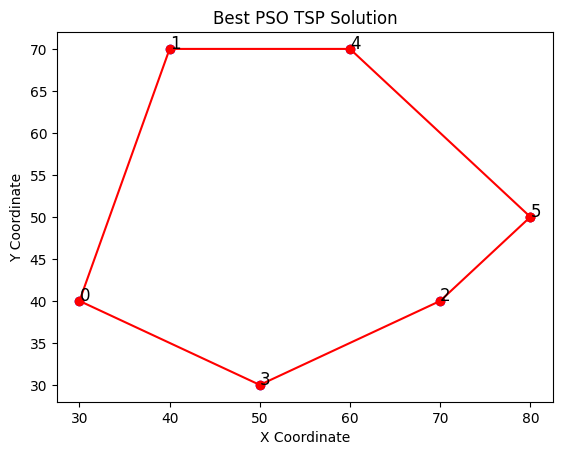

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy

def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

def total_distance(route, coordinates):
    dist = 0
    for i in range(len(route)-1):
        dist += euclidean_distance(coordinates[route[i]], coordinates[route[i+1]])
    dist += euclidean_distance(coordinates[route[-1]], coordinates[route[0]])  # Return to the start
    return dist

def plot_route(coordinates, route, title="PSO TSP Solution"):
    route_coords = coordinates[route]
    route_coords = np.vstack([route_coords, route_coords[0]])  # Closing the loop
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue')
    plt.plot(route_coords[:, 0], route_coords[:, 1], color='red', linestyle='-', marker='o')
    for i, coord in enumerate(coordinates):
        plt.text(coord[0], coord[1], str(i), fontsize=12)
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

class Particle:
    def __init__(self, route):
        self.route = route
        self.p_best = route
        self.p_best_distance = total_distance(route, coordinates)

    def update_personal_best(self, coordinates):
        current_distance = total_distance(self.route, coordinates)
        if current_distance < self.p_best_distance:
            self.p_best = self.route
            self.p_best_distance = current_distance

def apply_velocity(route, velocity):
    new_route = route[:]
    for (i, j) in velocity:
        new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

def particle_swarm_optimization(coordinates, num_particles=10, iterations=100):
    particles = [Particle(np.random.permutation(len(coordinates)).tolist()) for _ in range(num_particles)]
    g_best = min(particles, key=lambda p: p.p_best_distance).p_best
    g_best_distance = total_distance(g_best, coordinates)

    for _ in range(iterations):
        for particle in particles:
            # Update velocity: simple version, swap two cities
            if random.random() < 0.5:  # Randomly decide to update based on global best or personal best
                velocity = [(random.randint(0, len(coordinates) - 1), random.randint(0, len(coordinates) - 1))]
                candidate_route = apply_velocity(particle.p_best, velocity)
            else:
                velocity = [(random.randint(0, len(coordinates) - 1), random.randint(0, len(coordinates) - 1))]
                candidate_route = apply_velocity(g_best, velocity)

            # Update particle's route
            particle.route = candidate_route
            particle.update_personal_best(coordinates)

            # Update global best
            current_distance = total_distance(candidate_route, coordinates)
            if current_distance < g_best_distance:
                g_best = candidate_route
                g_best_distance = current_distance

    return g_best, g_best_distance

# Coordinates of the cities
coordinates = np.array([
    [30, 40],  # City 0
    [40, 70],  # City 1
    [70, 40],  # City 2
    [50, 30],  # City 3
    [60, 70],  # City 4
    [80, 50]   # City 5
])

# Run PSO
best_route, best_distance = particle_swarm_optimization(coordinates, num_particles=10, iterations=100)
print("Best route found by PSO:", best_route)
print("Best distance:", best_distance)

# Plot the best route found
plot_route(coordinates, best_route, title="Best PSO TSP Solution")


Best route found by PSO: [1, 4, 5, 2, 3, 0]
Best distance: 138.77054302287243


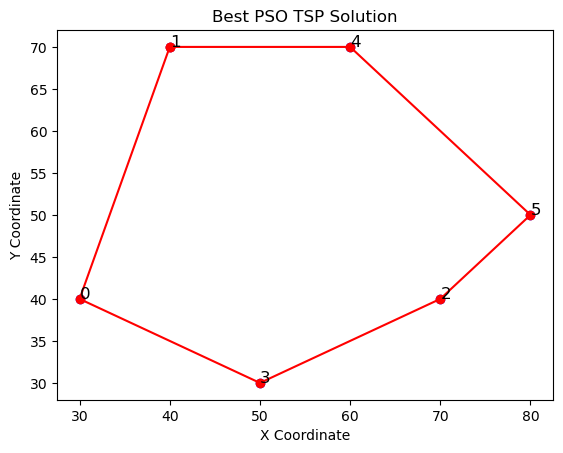

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy

def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

def total_distance(route, coordinates):
    dist = 0
    for i in range(len(route)-1):
        dist += euclidean_distance(coordinates[route[i]], coordinates[route[i+1]])
    dist += euclidean_distance(coordinates[route[-1]], coordinates[route[0]])  # Return to the start
    return dist

def plot_route(coordinates, route, title="PSO TSP Solution"):
    route_coords = coordinates[route]
    route_coords = np.vstack([route_coords, route_coords[0]])  # Closing the loop
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue')
    plt.plot(route_coords[:, 0], route_coords[:, 1], color='red', linestyle='-', marker='o')
    for i, coord in enumerate(coordinates):
        plt.text(coord[0], coord[1], str(i), fontsize=12)
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

class Particle:
    def __init__(self, route):
        self.route = route
        self.p_best = route
        self.p_best_distance = total_distance(route, coordinates)

    def update_personal_best(self, coordinates):
        current_distance = total_distance(self.route, coordinates)
        if current_distance < self.p_best_distance:
            self.p_best = self.route
            self.p_best_distance = current_distance

def apply_velocity(route, velocity):
    new_route = route[:]
    for (i, j) in velocity:
        new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

def particle_swarm_optimization(coordinates, num_particles=10, iterations=100):
    particles = [Particle(np.random.permutation(len(coordinates)).tolist()) for _ in range(num_particles)]
    g_best = min(particles, key=lambda p: p.p_best_distance).p_best
    g_best_distance = total_distance(g_best, coordinates)

    for _ in range(iterations):
        for particle in particles:
            # Update velocity: simple version, swap two cities
            if random.random() < 0.5:  # Randomly decide to update based on global best or personal best
                velocity = [(random.randint(0, len(coordinates) - 1), random.randint(0, len(coordinates) - 1))]
                candidate_route = apply_velocity(particle.p_best, velocity)
            else:
                velocity = [(random.randint(0, len(coordinates) - 1), random.randint(0, len(coordinates) - 1))]
                candidate_route = apply_velocity(g_best, velocity)

            # Update particle's route
            particle.route = candidate_route
            particle.update_personal_best(coordinates)

            # Update global best
            current_distance = total_distance(candidate_route, coordinates)
            if current_distance < g_best_distance:
                g_best = candidate_route
                g_best_distance = current_distance

    return g_best, g_best_distance

# Coordinates of the cities
coordinates = np.array([
    [30, 40],  # City 0
    [40, 70],  # City 1
    [70, 40],  # City 2
    [50, 30],  # City 3
    [60, 70],  # City 4
    [80, 50]   # City 5
])

# Run PSO
best_route, best_distance = particle_swarm_optimization(coordinates, num_particles=10, iterations=100)
print("Best route found by PSO:", best_route)
print("Best distance:", best_distance)

# Plot the best route found
plot_route(coordinates, best_route, title="Best PSO TSP Solution")


Stopping search: maximum iterations reached --> 100


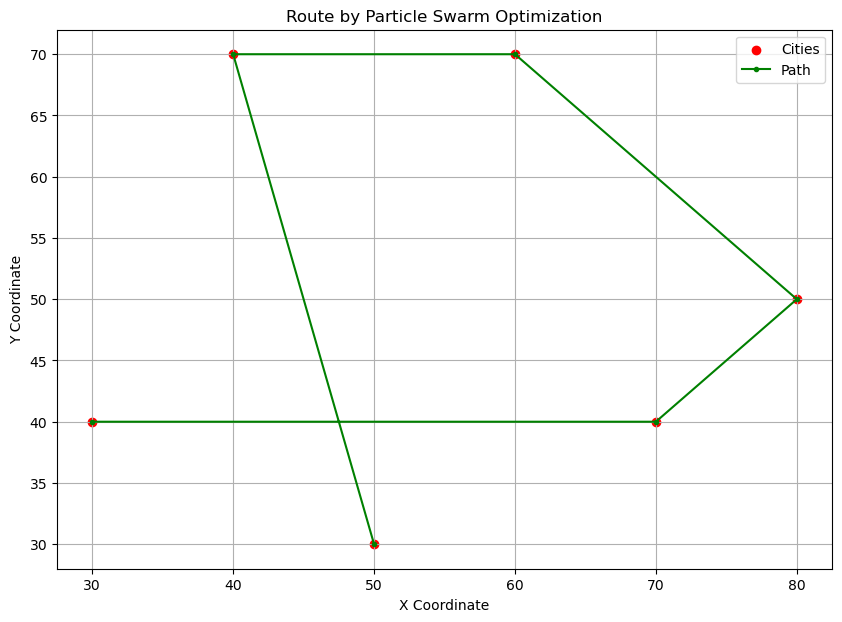

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pyswarm import pso

def tsp_objective_function(variables, coordinates):
    indices = np.argsort(variables)
    total_distance = np.sum(np.linalg.norm(coordinates[indices[:-1]] - coordinates[indices[1:]], axis=1))
    total_distance += np.linalg.norm(coordinates[indices[-1]] - coordinates[indices[0]])
    return total_distance

def solve_tsp_pso(coordinates, swarm_size=10, iterations=100):
    lb = [0] * len(coordinates)
    ub = [1] * len(coordinates)
    xopt, fopt = pso(tsp_objective_function, lb, ub, args=(coordinates,), swarmsize=swarm_size, maxiter=iterations)
    return np.argsort(xopt), fopt

def plot_route_pso(coordinates, route):
    plt.figure(figsize=(10, 7))
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='red', label='Cities')
    path = coordinates[route]
    plt.plot(path[:, 0], path[:, 1], 'g.-', label='Path')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Route by Particle Swarm Optimization')
    plt.legend()
    plt.grid(True)
    plt.show()

# Coordinates of the cities
coordinates = np.array([
    [30, 40], [40, 70], [70, 40], [50, 30], [60, 70], [80, 50]
])

# Solve TSP using PSO
route, _ = solve_tsp_pso(coordinates)
plot_route_pso(coordinates, route)


In [13]:
!pip install pyswarm

Defaulting to user installation because normal site-packages is not writeable
